In [1]:
from manifold_helper import ManifoldHelper
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']
neighbors = [5, 8, 10, 12]
dimensions = [2, 3, 5, 10, 25, 50, 100]
manifold = ManifoldHelper()

Using alternative LTSA.


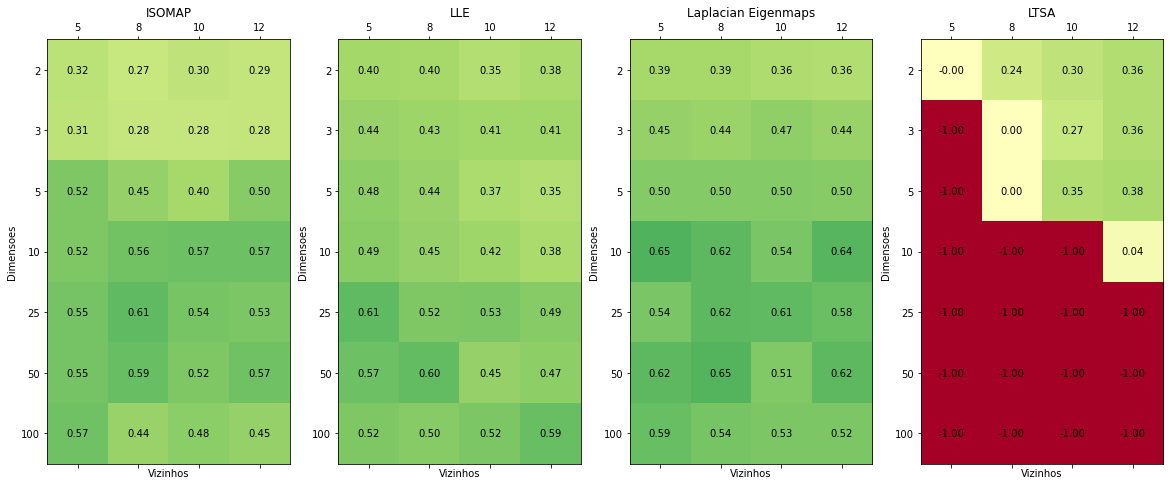

In [3]:
ari_results = manifold.loadARI(methods, add='id_3000')
manifold.plot_ari_results(ari_results, neighbors, dimensions)

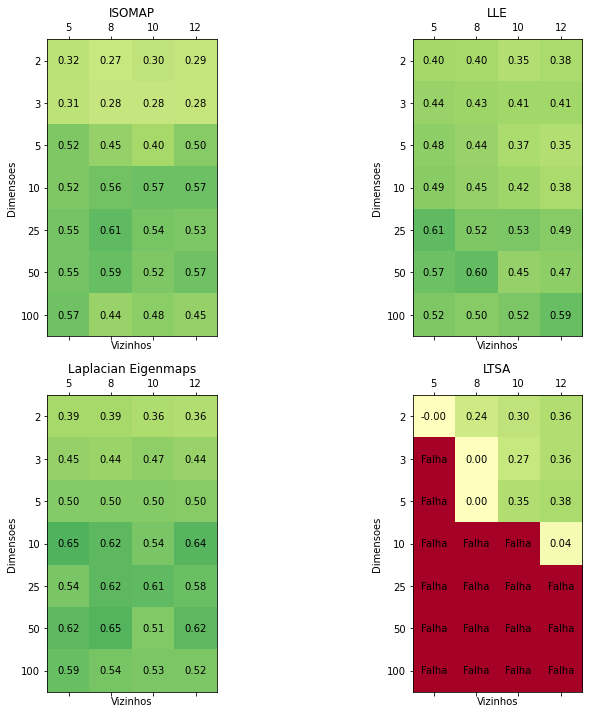

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2):
    for j in range(2):
        m = methods[2 * i + j]
        axs[i, j].matshow(ari_results[m], cmap='RdYlGn', vmin=-1.0, vmax=1.0)
        if m == 'SE':
            axs[i, j].set_title('Laplacian Eigenmaps')
        else:
            axs[i, j].set_title(m)
        axs[i, j].set_xticks([n for n in range(len(neighbors))])
        axs[i, j].set_xlabel('Vizinhos')
        axs[i, j].set_yticks([n for n in range(len(dimensions))])
        axs[i, j].set_ylabel('Dimensoes')
        axs[i, j].set_xticklabels(neighbors)
        axs[i, j].set_yticklabels(dimensions)
        for (e, f), z in np.ndenumerate(ari_results[m]):
            if z != -1.0:
                axs[i, j].text(f, e, '{:0.2f}'.format(z), ha='center', va='center')
            else:
                axs[i, j].text(f, e, 'Falha', ha='center', va='center')
plt.show()